### Customer Funnel Analysis 


Customer Funnel Analysis is a crucial methodology used in marketing and sales to understand the journey a customer takes from the initial interaction with a brand to the final conversion, such as a purchase. This process involves tracking and analyzing the various stages that potential customers pass through, commonly referred to as the "funnel stages." These stages typically include awareness, interest, consideration, intent, evaluation, and purchase.

The primary purpose of funnel analysis is to identify where customers drop off in their journey and to understand the factors that influence their decisions at each stage. By examining the conversion rates between stages, businesses can pinpoint bottlenecks, optimize their marketing strategies, and improve the overall customer experience. This leads to more effective targeting, higher conversion rates, and increased revenue.

In this project, we will conduct a detailed customer funnel analysis, evaluating the performance at each stage of the funnel. We will assess the number of users entering each stage, the conversion rates, and identify areas for improvement. This analysis will provide actionable insights to enhance customer acquisition, engagement, and retention strategies, ultimately driving business growth.

#### Customer Funnel Analysis using Python

Python packages are imported.

In [3]:
# import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

User data is loaded as a pandas dataframe and previewed.

* user_id: indicates unique user identifiers 
* stage: indicates the stage of the user's journey through the funnel 
* conversion: indicates whether the user converted or not

In [4]:
user_data = pd.read_csv("user_data.csv")
user_data.head(5)

,user_id,stage,conversion
0,user_0,homepage,True
1,user_1,homepage,True
2,user_2,homepage,True
3,user_3,homepage,True
4,user_4,homepage,True


The stages in the funnel analysis

* homepage: the first page when visiting the website 
* product_page: from the home page, the user can view and search products on the product page
* cart: products selected by the user on the product page are available here.
* checkout: page from the cart page, where user can make payment, add delivery details etc
* purchase: after payment, the user ends up on a purchase page or payment confirmation page

##### Steps for User Funnel Analysis

* Calculate thenumber of users at each stage
* Calculate the number of conversions at each stage
* Calculate the conversion rate for each stage

In [6]:
# Calculate the number of users at each stage
users_per_stage = user_data.groupby('stage')['user_id'].nunique().reset_index()
users_per_stage.columns = ['stage', 'users']

# Calculate the number of conversions at each stage
conversions_per_stage = user_data[user_data['conversion']].groupby('stage')['user_id'].nunique().reset_index()
conversions_per_stage.columns = ['stage', 'conversions']

# Merge the two DataFrames
funnel_data = pd.merge(users_per_stage, conversions_per_stage, on='stage', how='left')
funnel_data['conversions'] = funnel_data['conversions'].fillna(0)

# Calculate the conversion rate for each stage
funnel_data['conversion_rate'] = (funnel_data['conversions'] / funnel_data['users']) * 100

stage_order = ['homepage', 'product_page', 'cart', 'checkout', 'purchase']

# Set the 'stage' column to a categorical type with the defined order
funnel_data['stage'] = pd.Categorical(funnel_data['stage'], categories=stage_order, ordered=True)

# Sort the DataFrame by the 'stage' column
funnel_data = funnel_data.sort_values('stage').reset_index(drop=True)

funnel_data

,stage,users,conversions,conversion_rate
0,homepage,10000,10000,100.000000
1,product_page,5000,2515,50.300000
2,cart,1500,449,29.933333
3,checkout,450,36,8.000000
4,purchase,225,14,6.222222


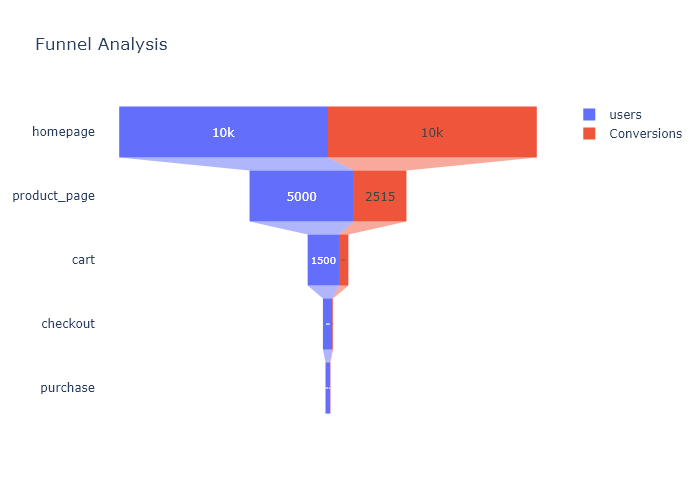

In [11]:
from io import BytesIO
import kaleido
import matplotlib.image as mpimg
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

fig = go.Figure(go.Funnel(
    y = funnel_data['stage'],
    x = funnel_data['users'],
    textposition = 'inside',
    textinfo = 'value',
    name = 'users'
))

fig.add_trace(go.Funnel(
    y=funnel_data['stage'],
    x=funnel_data['conversions'],
    textposition='inside',
    textinfo='value',
    name='Conversions'
))

fig.update_layout(
    title='Funnel Analysis',
    funnelmode='stack'
)


fig.show("png")

![title](test.png)

#### Summary

The funnel analysis reveals several critical insights into the customer journey. The homepage effectively captures user interest, with all 10,000 visitors proceeding to the product page, resulting in a 100% conversion rate at this stage. However, a significant drop-off occurs at the product page, with only 2,515 out of 5,000 users converting (50.3%). This suggests a need for improved product descriptions and visuals. The cart stage also shows a notable decrease, with 1,500 users and a conversion rate of 29.93%, indicating potential issues with the cart process and unexpected costs. The checkout stage has a low conversion rate of 8% with only 450 users, likely due to complicated payment processes and trust concerns. Finally, the purchase stage sees the fewest conversions, with just 14 out of 225 users (6.22%), highlighting the need for incentives and transparent pricing.

Addressing these issues by optimizing product pages, simplifying cart and checkout processes, building user trust, and conducting A/B testing can improve overall funnel efficiency. These improvements are expected to lead to higher conversion rates and better customer satisfaction, ultimately driving business growth.